<a href="https://colab.research.google.com/github/rithikavishwanath/Cat-and-dog-classification-using-CNN/blob/main/cats_v_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:30<00:00, 37.2MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.6MB/s]


In [8]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [10]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
#normalize
def process(image, label):
  image=tf.cast(image/255., tf.float32)
  return image, label

train_ds=train_ds.map(process)
validation_ds= validation_ds.map(process)

In [12]:
#creating the CNN model

# 3 convlution layers:
# 1st layer : 32 filters
# 2nd layer : 64 filters
# 3rd layer : 128 filters

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding ='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding ='valid', activation='relu', ))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), padding ='valid', activation='relu', ))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 92ms/step - loss: 0.6671 - accuracy: 0.5990 - val_loss: 0.5917 - val_accuracy: 0.6932
Epoch 2/10
625/625 [==============================] - 55s 86ms/step - loss: 0.5470 - accuracy: 0.7237 - val_loss: 0.5058 - val_accuracy: 0.7542
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.4185 - accuracy: 0.8086 - val_loss: 0.4906 - val_accuracy: 0.7752
Epoch 4/10
625/625 [==============================] - 58s 92ms/step - loss: 0.2681 - accuracy: 0.8888 - val_loss: 0.7133 - val_accuracy: 0.7570
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1348 - accuracy: 0.9488 - val_loss: 1.0966 - val_accuracy: 0.7486
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0835 - accuracy: 0.9707 - val_loss: 1.4592 - val_accuracy: 0.7198
Epoch 7/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0693 - accuracy: 0.9785 - val_loss: 1.2214 - val_accuracy:

In [16]:
import cv2

In [25]:
dogimg=cv2.imread('/content/cat.jpg')

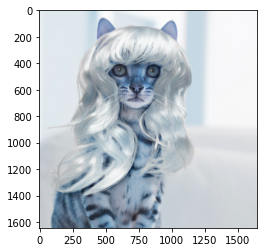

In [26]:
import matplotlib.pyplot as plt
plt.imshow(dogimg)

In [27]:
dogimg.shape

(1644, 1644, 3)

In [28]:
dogimg=cv2.resize(dogimg, (256, 256))

In [29]:
test_input=dogimg.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 [==============================] - 0s 24ms/step


array([[0.]], dtype=float32)